In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 9

In [13]:
from libnn import datasets
from libnn.losses import CategoricalCrossEntropy
from libnn.modules.activations import Softmax, Tanh, ReLU
from libnn.modules.layers import Linear
from libnn.modules.module import Sequential 

from experiments import plotting

In [5]:
X, y = datasets.spirals(300)

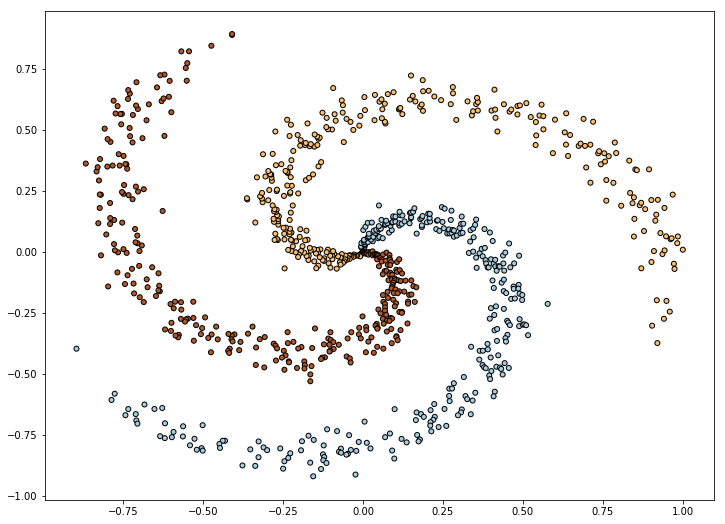

In [9]:
plotting.scatter(X, y)

In [10]:
def make_model(input_shape, output_shape, n_layers, hidden_size=10, initialization='xavier_relu'):
    n_hidden_layers = n_layers - 2

    layers = []
    layers.append(Linear(input_shape, hidden_size, init=initialization))
    layers.append(ReLU())
    
    for i in range(n_hidden_layers):
        layers.append(Linear(hidden_size, hidden_size, init=initialization))
        layers.append(ReLU())
        
    layers.append(Linear(hidden_size, output_shape, init=initialization))
    layers.append(Softmax())
    
    return Sequential(*layers)

In [29]:
def get_losses(model, n_epochs=5000):
    loss = CategoricalCrossEntropy()
    losses = []

    learning_rate = 0.03
    for epoch in range(n_epochs):
        z = model(X)

        error = loss(z, y)
        losses.append(error)

        gradient = loss.gradient()
        gradient = model.backward(gradient)

        for parameter in model.trainable_parameters():
            parameter -= learning_rate * parameter.grad
    
    return losses

Training random normal
1.0986122886681102
Training xavier
0.05120997166724164


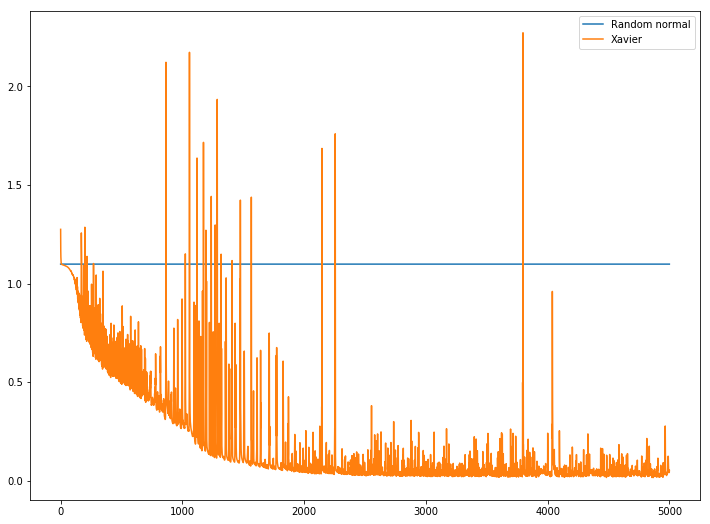

In [39]:
n_layers = 20
hidden_size = 10

print('Training random normal')
model = make_model(X.shape[1], 3, n_layers=n_layers, initialization='random_normal', hidden_size=hidden_size)
random_losses = get_losses(model)
print(random_losses[-1])

print('Training xavier')
model = make_model(X.shape[1], 3, n_layers=n_layers, initialization='xavier_relu', hidden_size=hidden_size)
xavier_losses = get_losses(model)
print(xavier_losses[-1])

plt.plot(np.arange(len(random_losses)), random_losses, label='Random normal')
plt.plot(np.arange(len(xavier_losses)), xavier_losses, label='Xavier')
plt.legend()

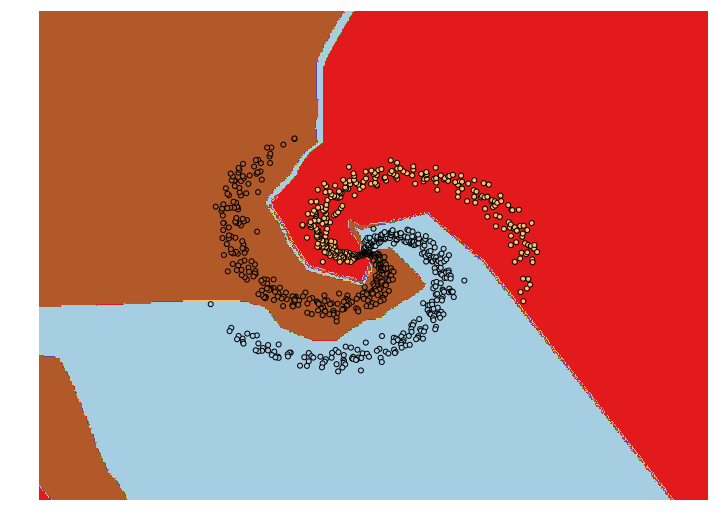

In [40]:
plotting.decision_boundary(X, y, model)